<a href="https://colab.research.google.com/github/Amelaouadni/Implementing-ANN-CNN-and-RNN-/blob/main/CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PACKAGES
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Dataset
(x_train, y_train), (x_test, y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


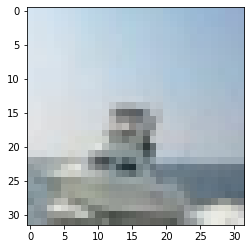

In [ ]:
plt.imshow(x_train[100])
print(y_train)

In [ ]:
#normalization 
x_train= x_train/255.0
x_test= x_test/255.0

In [ ]:
x_train[5]

array([[[0.62352941, 0.4       , 0.39607843],
        [0.58823529, 0.35686275, 0.37254902],
        [0.6       , 0.37254902, 0.38039216],
        ...,
        [0.35686275, 0.27843137, 0.21960784],
        [0.29019608, 0.24705882, 0.21568627],
        [0.29803922, 0.22745098, 0.21568627]],

       [[0.55686275, 0.29411765, 0.26666667],
        [0.57254902, 0.28235294, 0.25882353],
        [0.60784314, 0.29803922, 0.25490196],
        ...,
        [0.49803922, 0.41176471, 0.27843137],
        [0.47843137, 0.43529412, 0.36470588],
        [0.3372549 , 0.27058824, 0.23921569]],

       [[0.42745098, 0.2627451 , 0.29411765],
        [0.38823529, 0.22745098, 0.23529412],
        [0.41176471, 0.23137255, 0.20392157],
        ...,
        [0.5372549 , 0.43921569, 0.31372549],
        [0.63921569, 0.51764706, 0.41176471],
        [0.36470588, 0.28235294, 0.27843137]],

       ...,

       [[0.95686275, 0.50588235, 0.2745098 ],
        [0.94117647, 0.48235294, 0.25490196],
        [0.94509804, 0

In [ ]:
#Model
model= Sequential()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# conv reseau (CNN)
model.add(Conv2D(256,(3,3),input_shape= x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
# fully connected
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss= 'sparse_categorical_crossentropy', optimizer="Adam", metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       590080    
_________________________________________________________________
activation (Activation)      (None, 28, 28, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3211328   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [ ]:
#Entrainer le modele
model.fit(x_train, y_train, batch_size= 32, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 2626s 2s/step - loss: 1.6773 - sparse_categorical_accuracy: 0.3918
Epoch 2/10
1563/1563 [==============================] - 2610s 2s/step - loss: 1.1249 - sparse_categorical_accuracy: 0.6088
Epoch 3/10
 921/1563 [================>.............] - ETA: 17:54 - loss: 0.9990 - sparse_categorical_accuracy: 0.6503